In [1]:
library(igraph)
library(ggplot2)
library('pracma')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



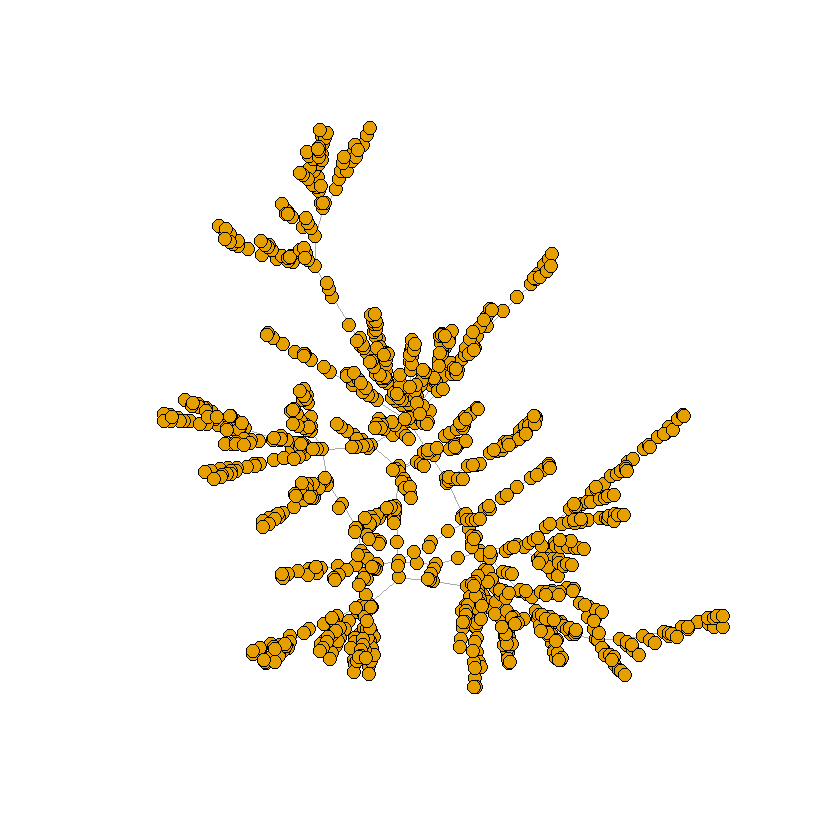

In [45]:
g_pa_age = sample_pa_age(1000, pa.exp=1, aging.exp=-1, m=1, directed = F,
  zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
dd_pa_age = degree_distribution(g_pa_age)
layout <-layout.fruchterman.reingold(g_pa_age)
plot(g_pa_age,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

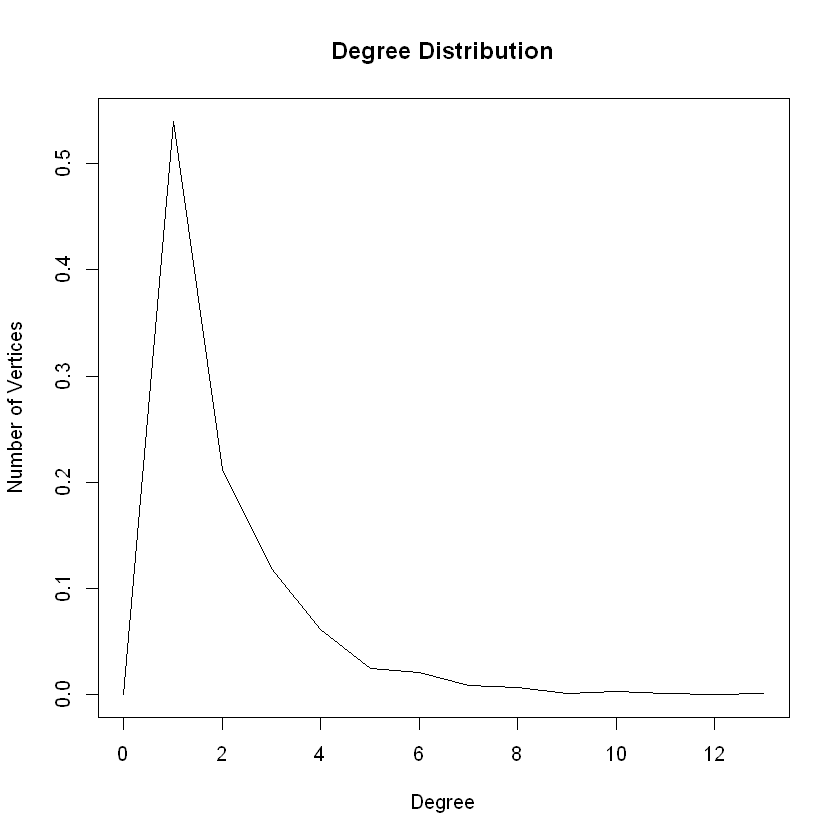

In [34]:
g_pa_age = sample_pa_age(n=1000,pa.exp = 1,aging.exp = -1,m=1 , directed=FALSE)
dd_pa_age = degree_distribution(g_pa_age)
lab1 = seq(0, length(dd_pa_age)-1)
plot(lab1, dd_pa_age, type="l", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [74]:
# plot and fit the power law distribution
fit_power_law1 = function(graph) {
    # calculate degree
    d = degree(graph, mode = "all")
    dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
    degree = 1:max(d)
    probability = dd[-1]
    # delete blank values
    nonzero.position = which(probability != 0)
    probability = probability[nonzero.position]
    degree = degree[nonzero.position]
    reg = lm(log(probability) ~ log(degree))
    cozf = coef(reg)
    power.law.fit = function(x) exp(cozf[[1]] + cozf[[2]] * log(x))
    alpha = -cozf[[2]]
    R.square = summary(reg)$r.squared
    print(paste("Alpha =", round(alpha, 3)))
    print(paste("R square =", round(R.square, 3)))
    # plot
    plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
        col = 1, main = "Degree Distribution")
    curve(power.law.fit, col = "red", add = T, n = length(d))
}



[1] "Alpha = 2.625"
[1] "R square = 0.934"


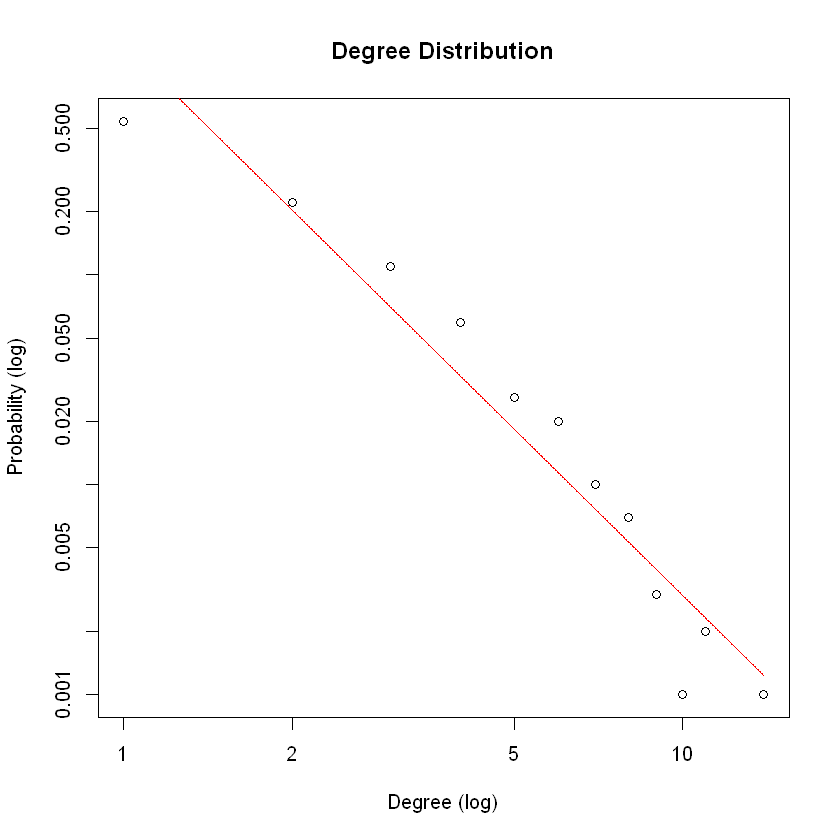

In [75]:
fit_power_law1(g_pa_age)

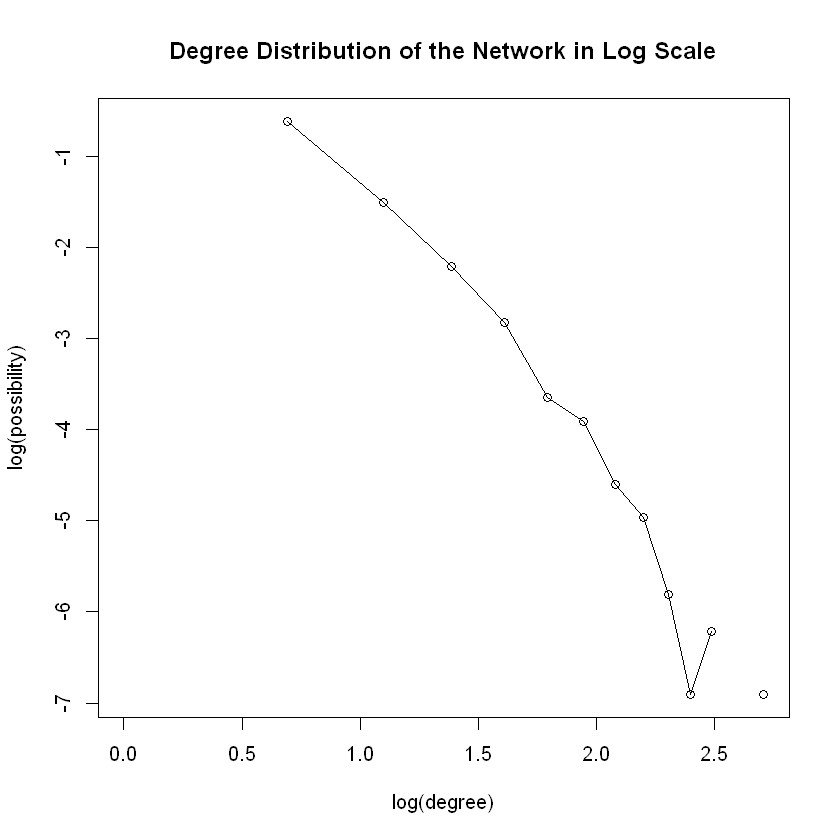

In [66]:
g_pa_age = sample_pa_age(1000, pa.exp=1, aging.exp=-1, m=1, directed = F,
  zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)


dd_pa_age = degree_distribution(g_pa_age)
log_degree <- log(c(1:length(dd_pa_age)))
log_distr <- log(dd_pa_age)
plot(log_degree, log_distr, type="o",main=paste("Degree Distribution of the Network in Log Scale"),xlab="log(degree)",ylab="log(possibility)")


In [65]:
fit1 <- fit_power_law(dd_pa_age)
fit1$alpha

[1] 1.420181

In [57]:
pa_fast_greedy = function(g,n, type='cluster_fast_greedy'){
    if(type == 'walktrap'){
        cs = cluster_walktrap(g)
    }
    else {
        cs = cluster_fast_greedy(g)
    }
    layout = layout_with_fr(g)
    
    plot(cs, g, layout = layout, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main=paste("n = ", n))
    print(paste("Modularity: ", modularity(g, membership(cs))))
    print(paste("Connected: ", is_connected(g)))
}

[1] "Modularity:  0.934957480002525"
[1] "Connected:  TRUE"


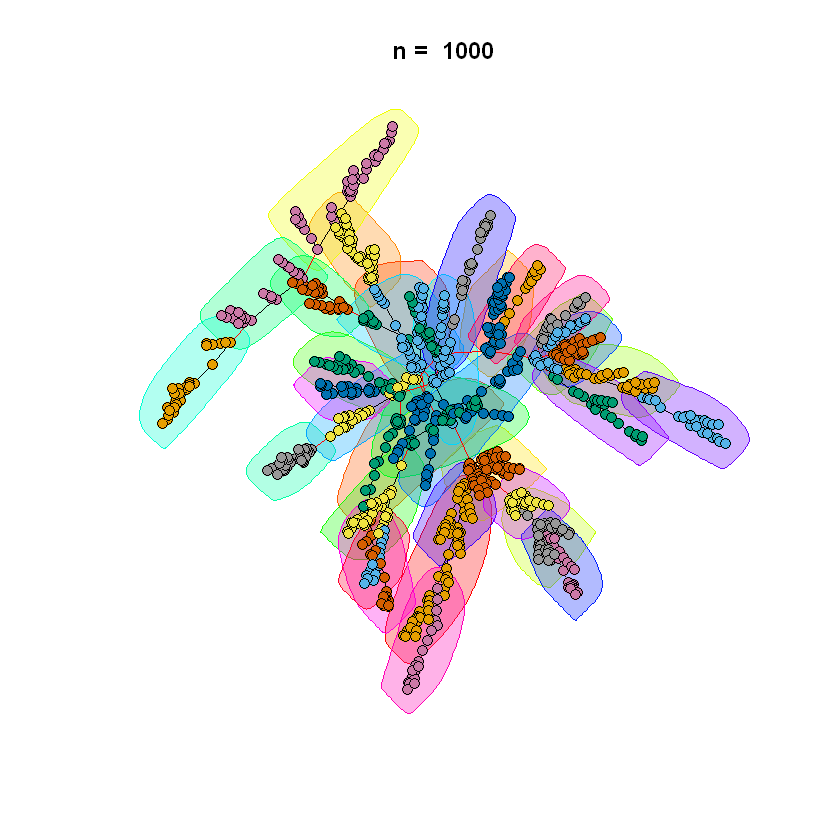

In [12]:
pa_fast_greedy(g_pa_age, 1000)

In [13]:

r1 = cluster_fast_greedy(g_pa_age, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g_pa_age, r1_mem)

[1] 0.934452

In [2]:
#Part 2
#Question 1


In [4]:
get_transition_matrix = function(g){
  vs = V(g)
  n = vcount(g)
  adj = as_adjacency_matrix(g)
  adj[diag(Matrix::rowSums(adj) == 0)] = 1
  z = matrix(Matrix::rowSums(adj, , 1))
  
  transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
  
  return(transition_matrix)
}

In [5]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
 
    visited_nodes = rep(0,num_steps)
  if(is.null(transition_matrix))
    transition_matrix = create_transition_matrix(g)
  
  v = start_node
    
  for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        visited_nodes[i] = v
  }
  
  return(visited_nodes)
}

In [77]:
random_walk_with_plots = function (graph,no_of_nodes, NUM_TRIALS = 1000,NUM_STEPS = 200){
    
    N = no_of_nodes
    P = 0.01
    
   
    last_nodes = array(1:NUM_TRIALS)

    transitions = get_transition_matrix(graph)
    visit_matrix = matrix(0,NUM_TRIALS,NUM_STEPS)
    for (i in 1:NUM_TRIALS) {
        visit_matrix[i,1:NUM_STEPS] = random_walk(graph, NUM_STEPS, sample(vcount(graph),1), transitions)
    }

    # Analyze the distance from the starting node of each step in the random walk

    distance_matrix = matrix(0,NUM_TRIALS,NUM_STEPS)
    shortest_path_matrix = shortest.paths(graph)

    for (i in 1:NUM_TRIALS) {
        for (j in 2:NUM_STEPS) {
            
            distance_matrix[i,j] = shortest_path_matrix[visit_matrix[i,1],visit_matrix[i,j]]
        }
    }


    mean_distances = colSums(distance_matrix) / NUM_TRIALS
    mean_matrix = matrix(mean_distances,nrow=NUM_TRIALS,ncol=length(mean_distances),byrow=TRUE)
    variance_matrix = (distance_matrix - mean_matrix)^2
    mean_variances = colSums(variance_matrix) / NUM_TRIALS

    plot(mean_distances, main =paste("Average distance vs time with", N, "nodes"), xlab = "t", ylab = "Mean Shortest Distance")
    plot(mean_variances, main = paste("Variance vs time with", N, "nodes"), xlab="t", ylab="Variance of Shortest Distance")

    hist(degree(graph,visit_matrix[1:NUM_TRIALS,NUM_STEPS]), ,main="Degree dist. for last nodes of random walk",xlab="Degree",ylab="Frequency")
    hist(degree(graph), main="Degree distribution of the network", xlab="Degree",ylab="Frequency")
}


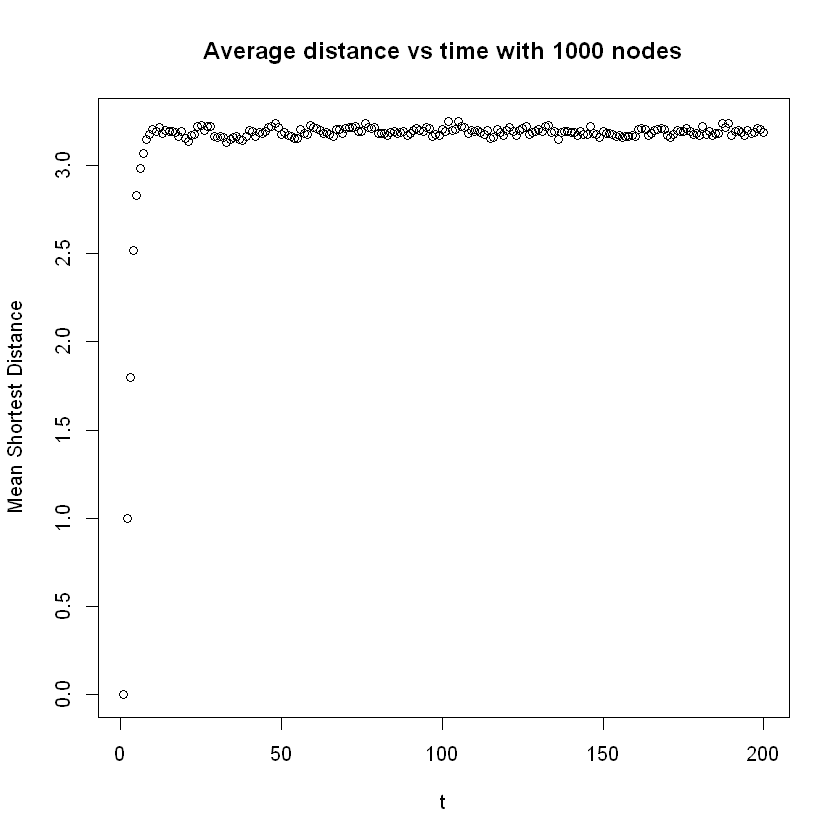

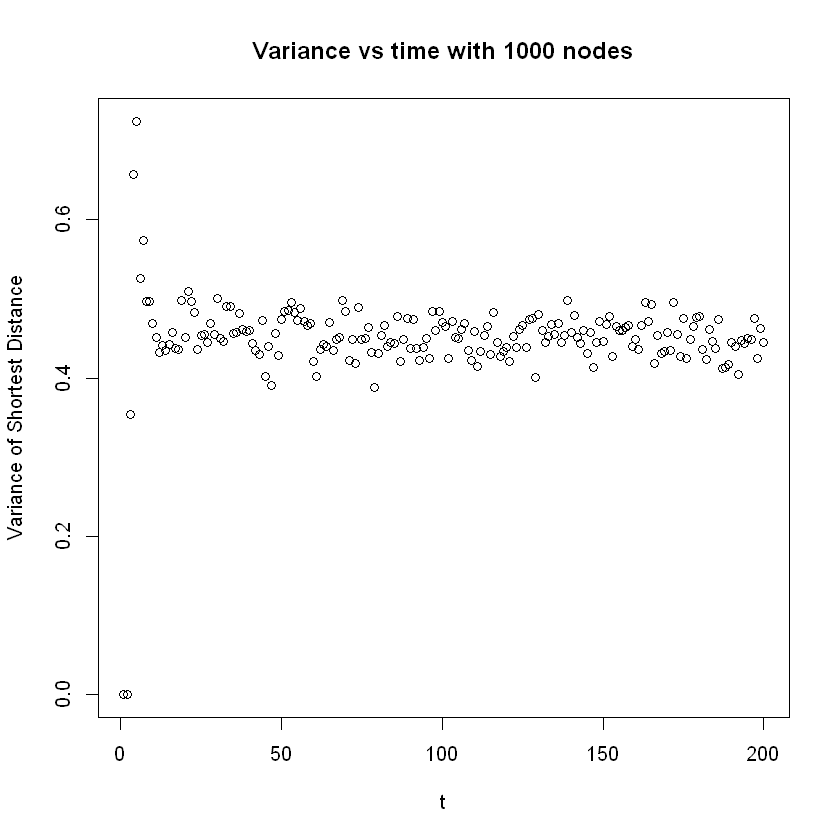

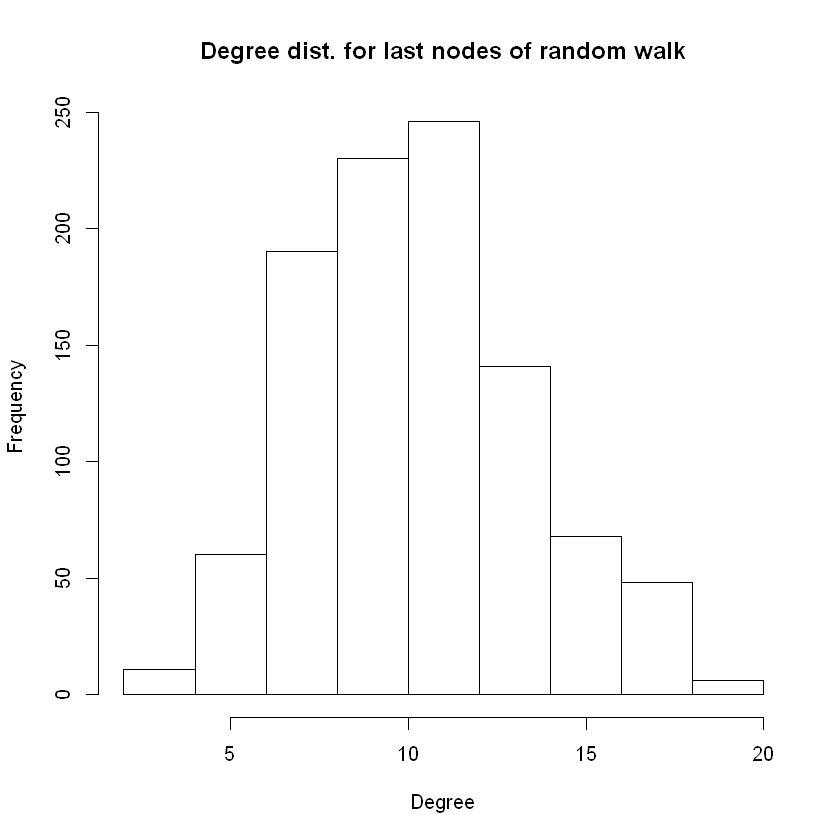

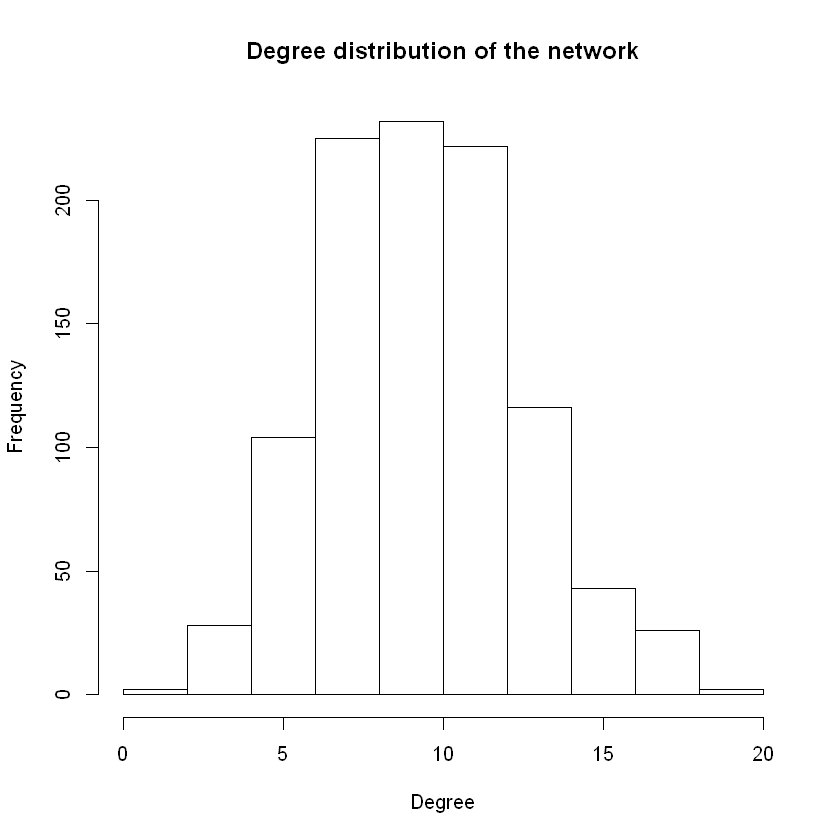

In [78]:
erdos_graph = erdos.renyi.game(1000, p.or.m=0.01, type="gnp")
random_walk_with_plots(erdos_graph,1000)

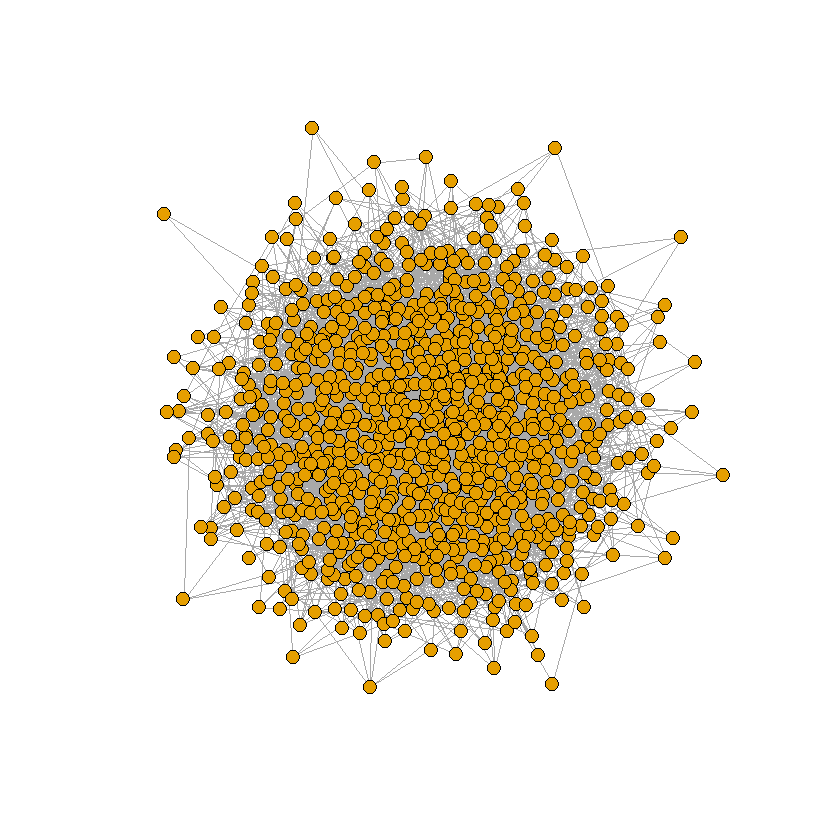

In [13]:
erdos_graph = erdos.renyi.game(1000, p.or.m=0.01, type="gnp")
layout <-layout.fruchterman.reingold(erdos_graph)
plot(erdos_graph,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

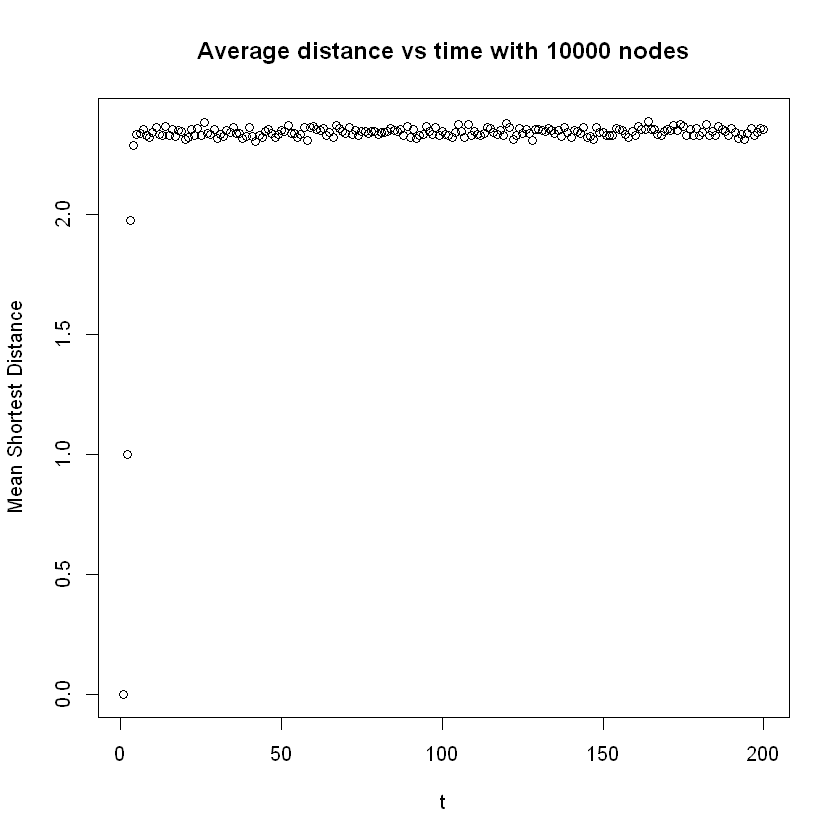

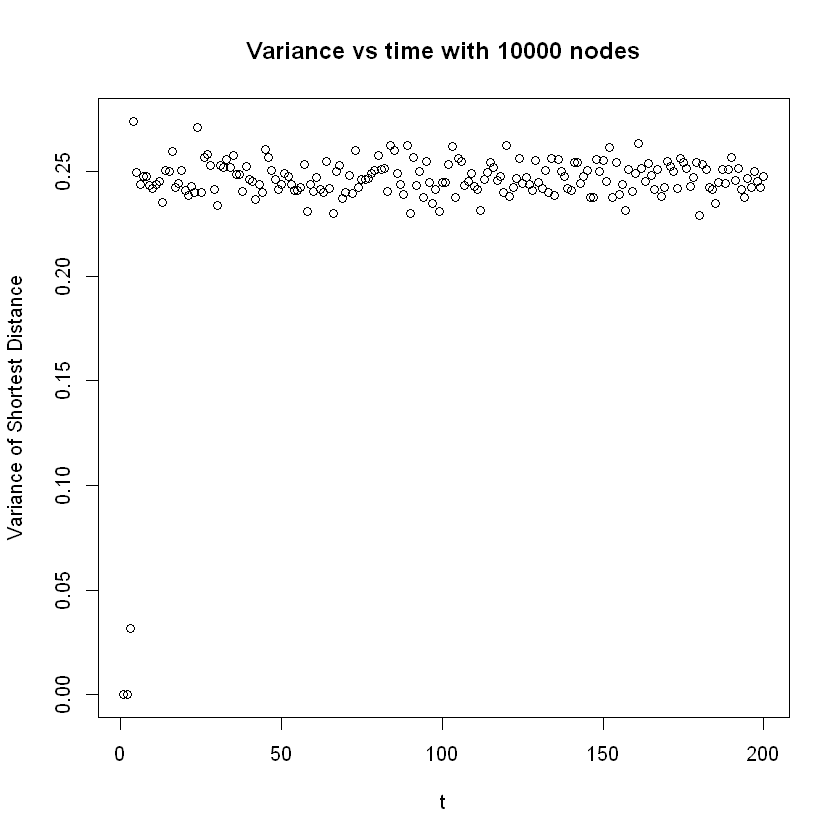

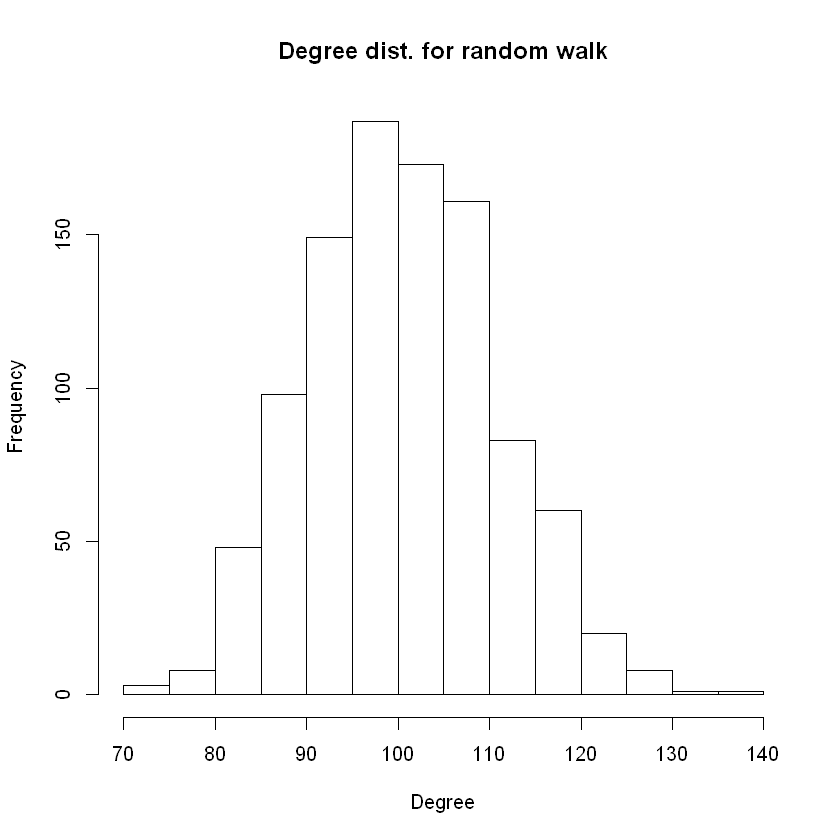

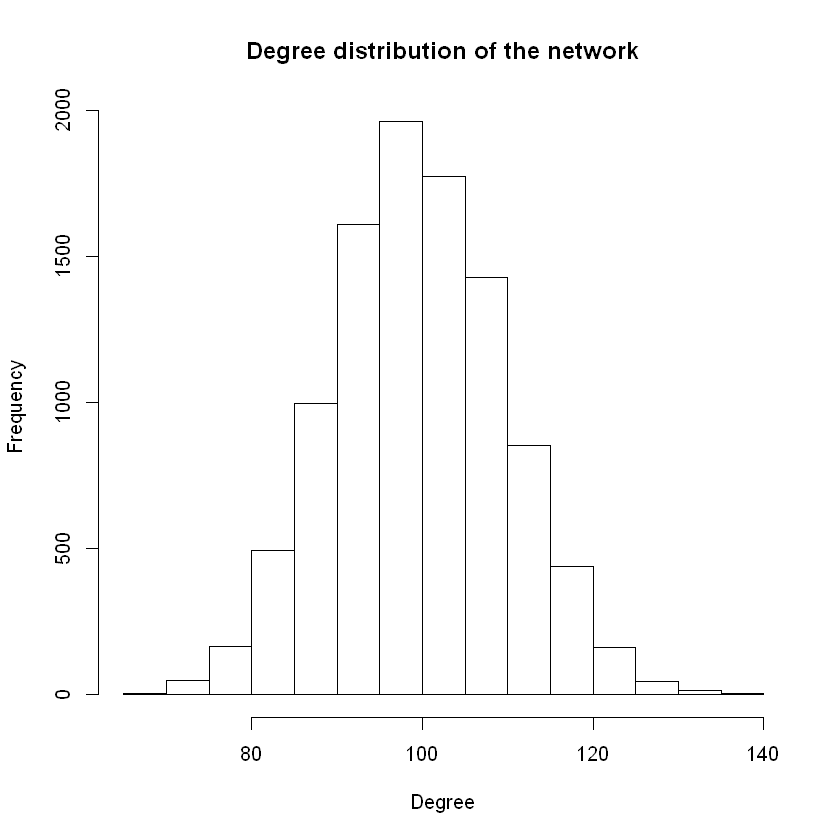

In [20]:
erdos_graph = erdos.renyi.game(10000, p.or.m=0.01, type="gnp")
random_walk_with_plots(erdos_graph,10000)

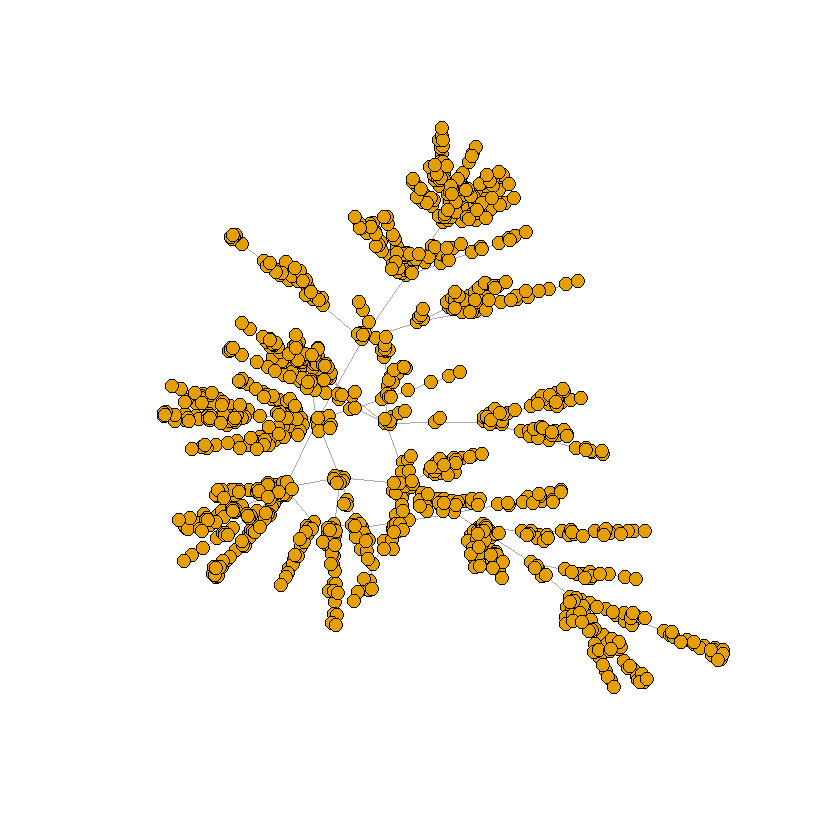

In [23]:
pa_g_age = barabasi.game(1000, m=1, directed=F)
layout <-layout.fruchterman.reingold(pa_g_age)
plot(pa_g_age,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

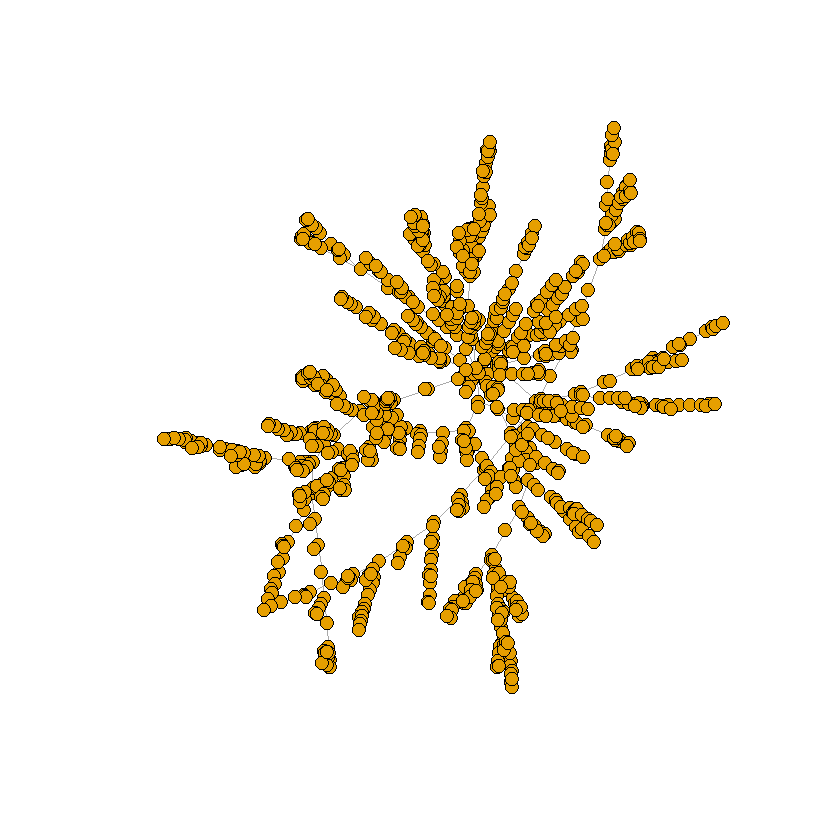

In [24]:
g_pa_age = sample_pa_age(n=1000,pa.exp = 1,aging.exp = -1,m=1 , directed=FALSE)
layout <-layout.fruchterman.reingold(g_pa_age)
plot(g_pa_age,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

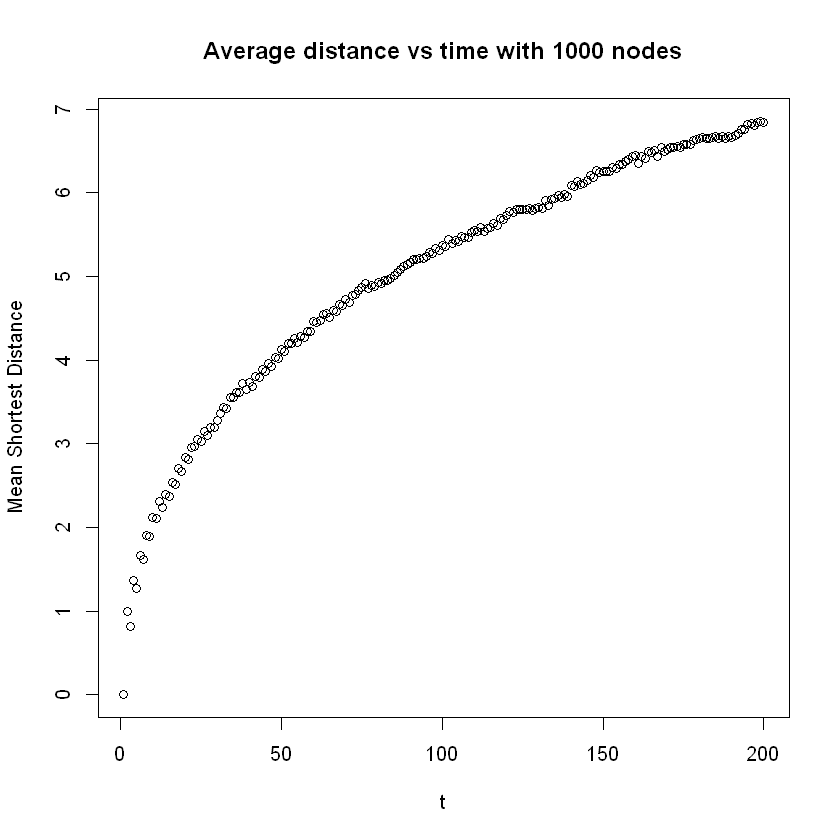

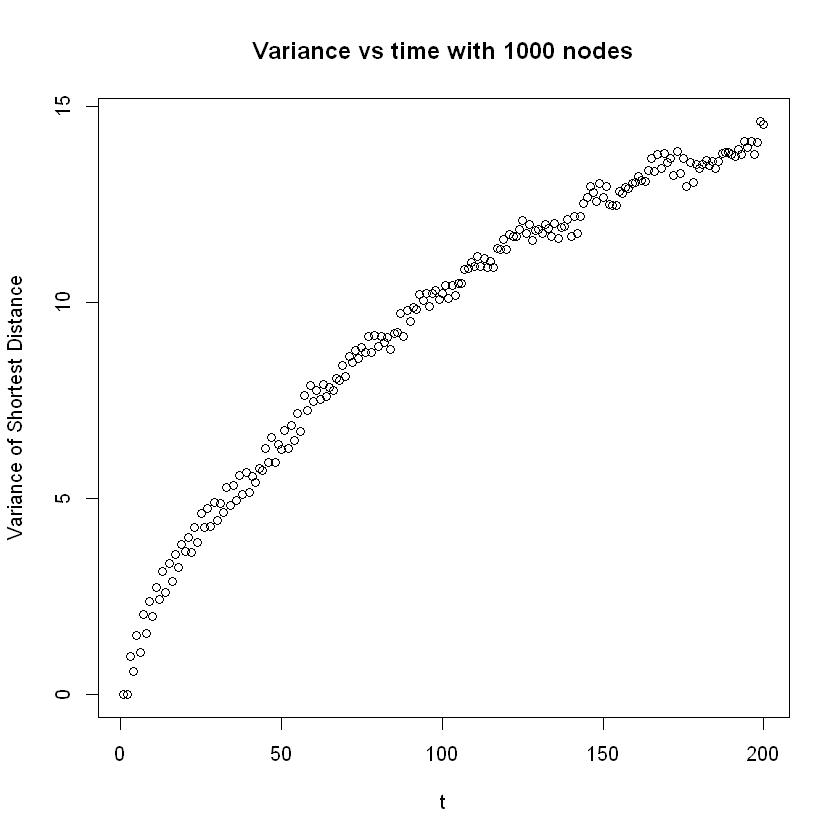

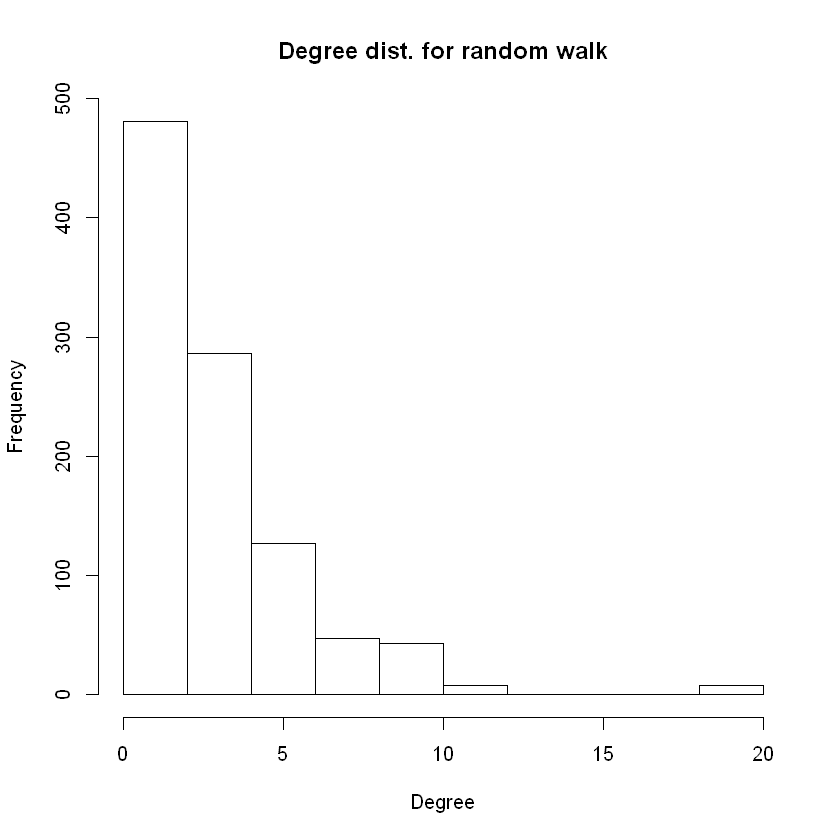

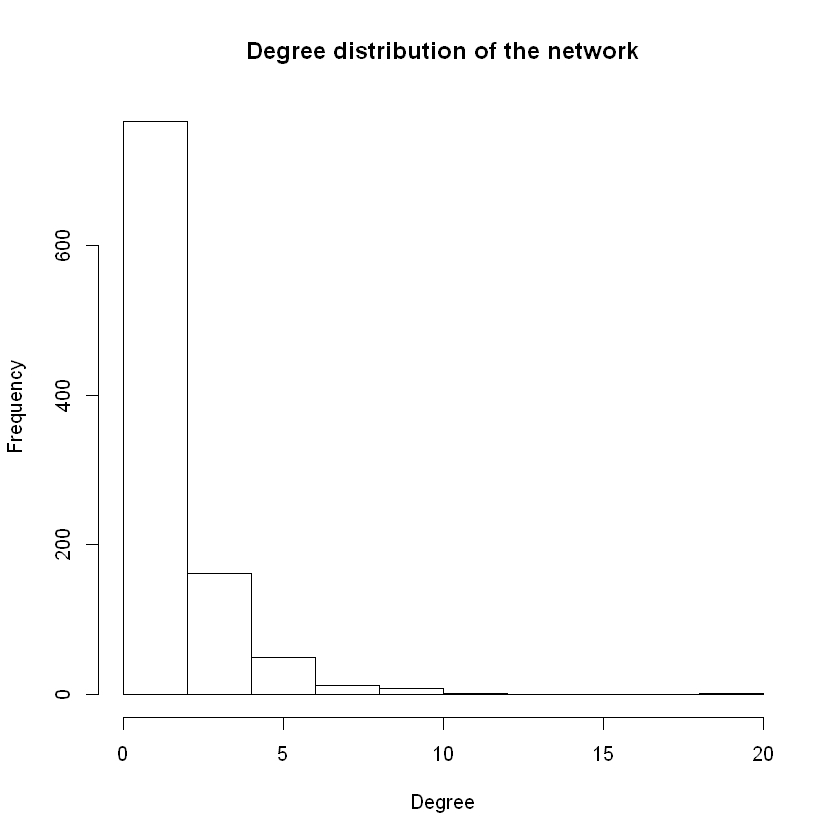

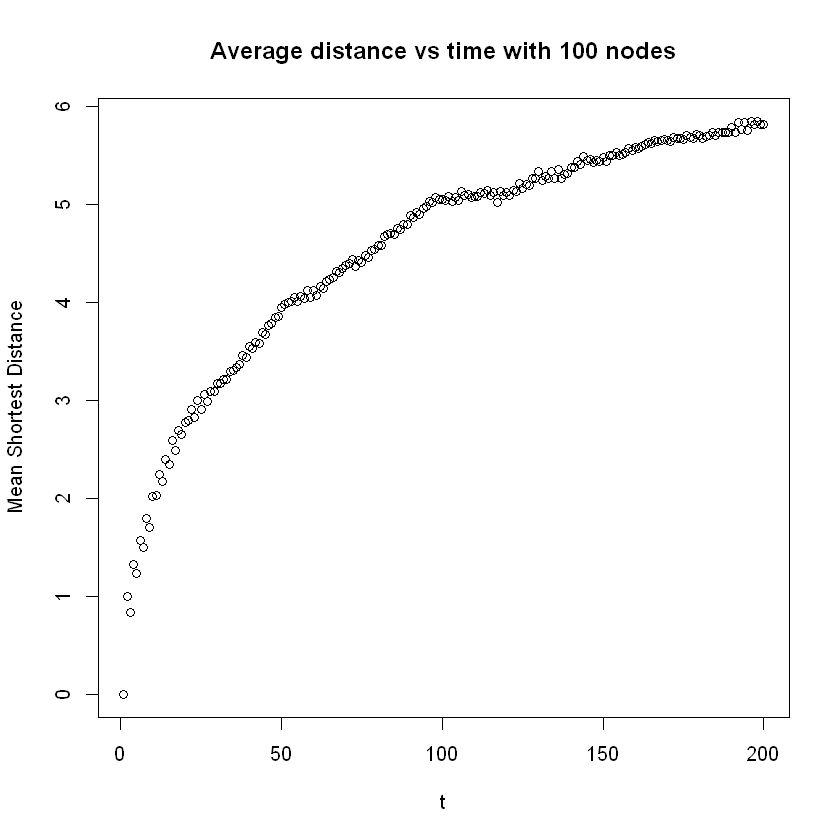

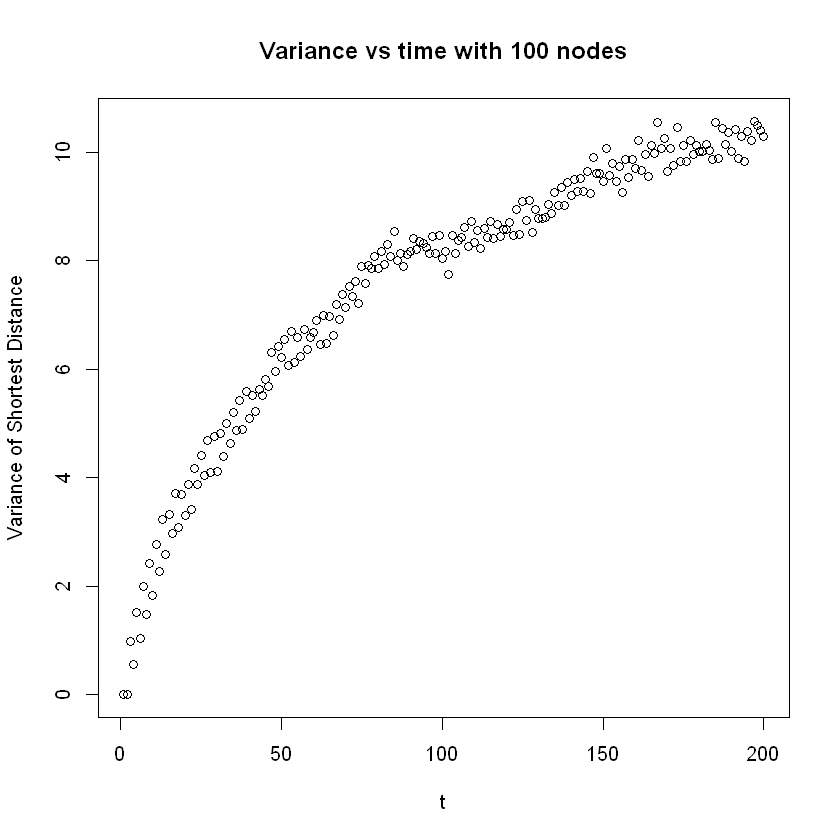

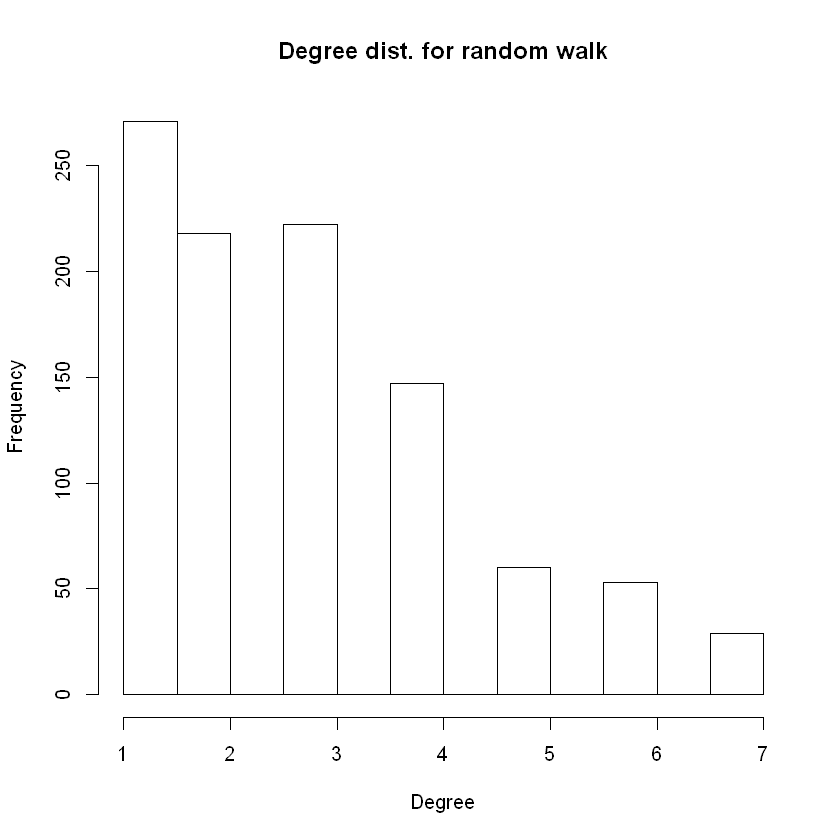

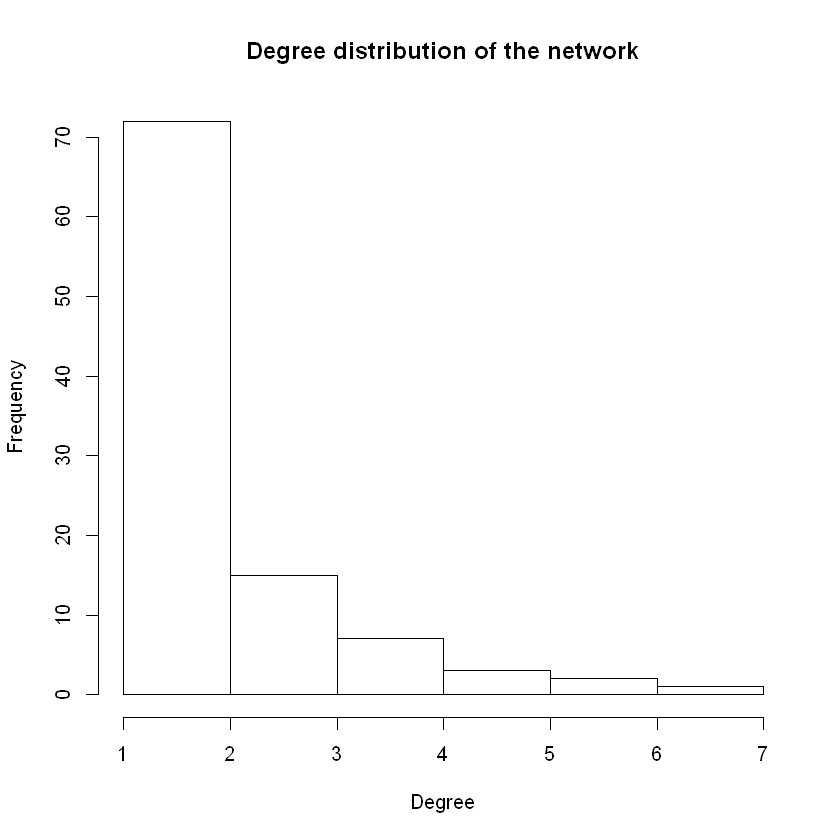

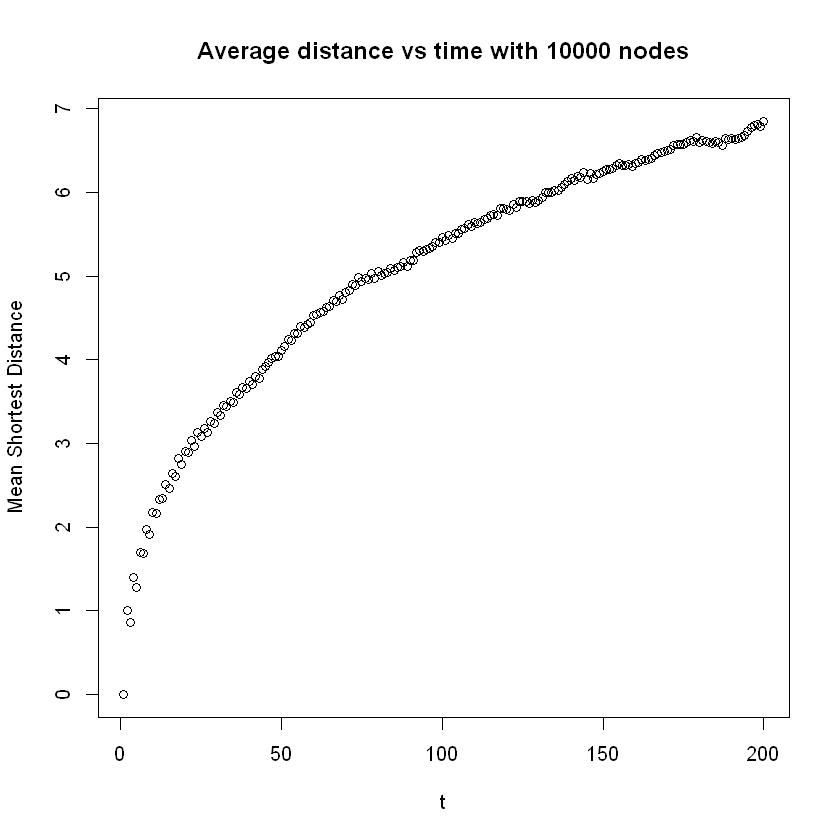

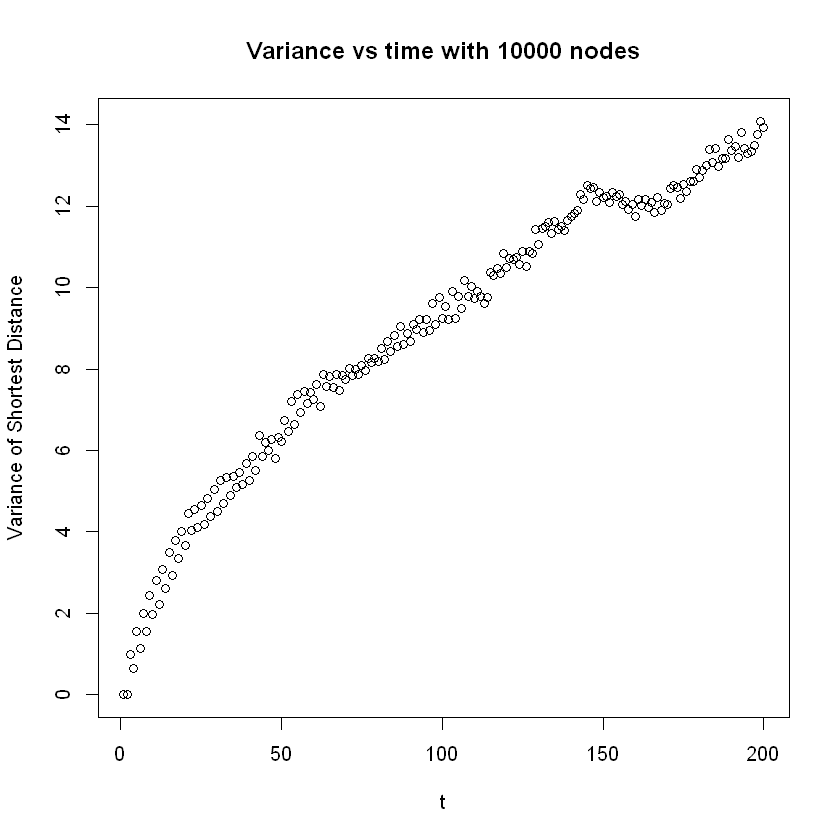

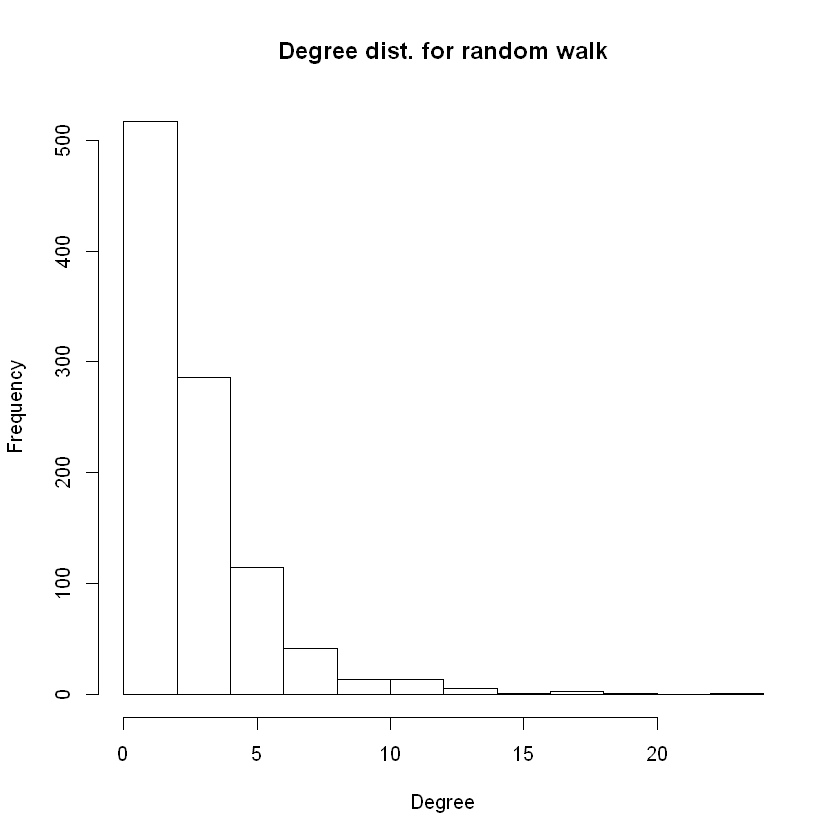

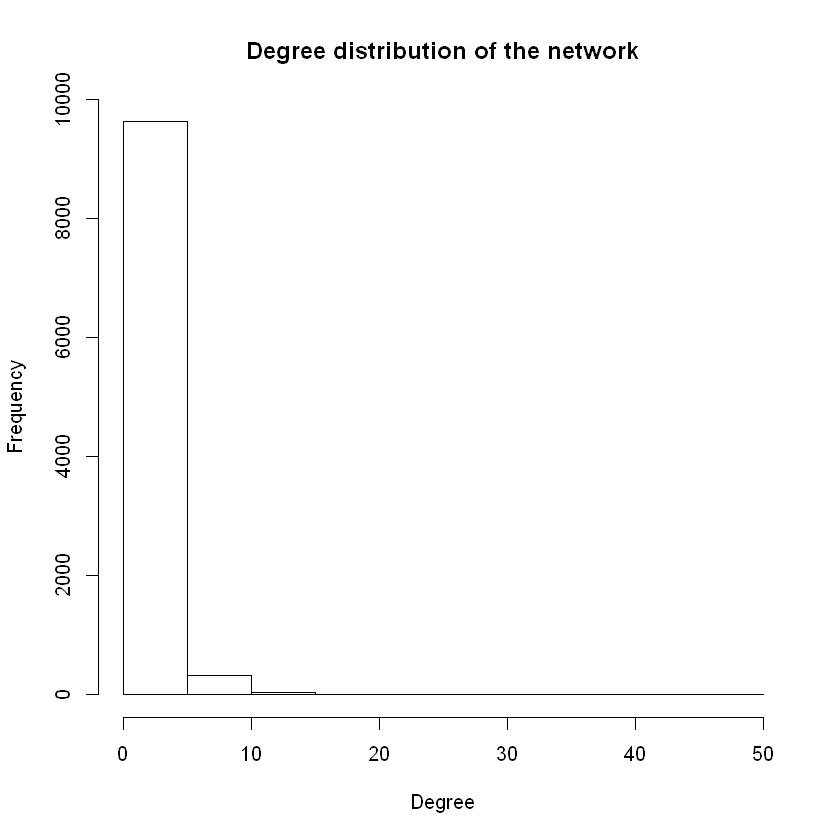

In [7]:
g_pa_age = sample_pa_age(n=1000,pa.exp = 1,aging.exp = -1,m=1 , directed=FALSE)
random_walk_with_plots(g_pa_age,1000)

g_pa_age = sample_pa_age(n=100,pa.exp = 1,aging.exp = -1,m=1 , directed=FALSE)
random_walk_with_plots(g_pa_age,100)


g_pa_age = sample_pa_age(n=10000,pa.exp = 1,aging.exp = -1,m=1 , directed=FALSE)
random_walk_with_plots(g_pa_age,10000)

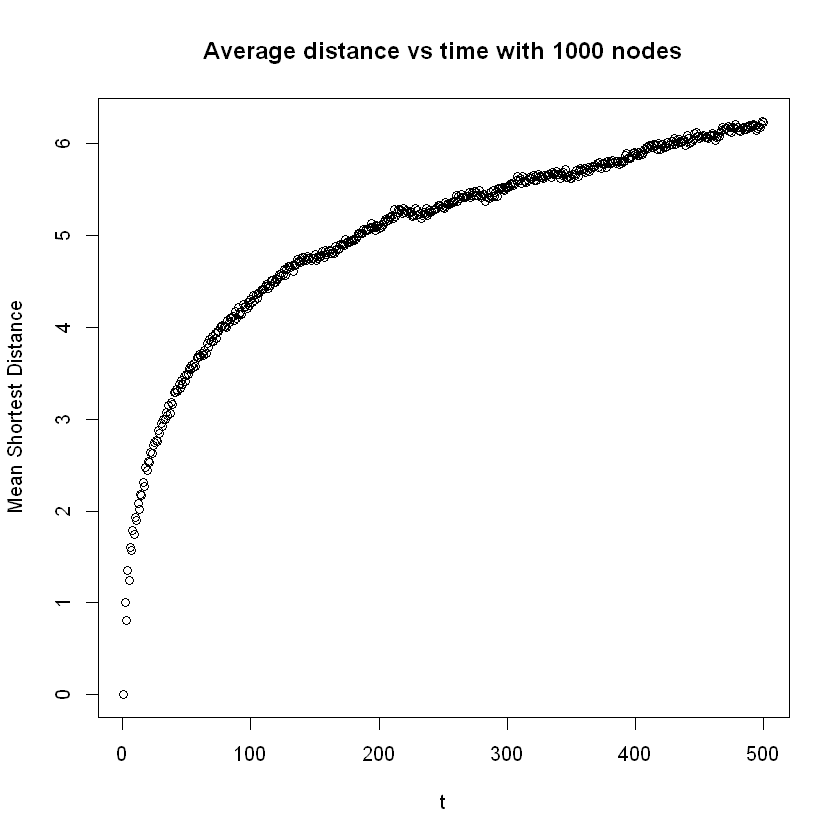

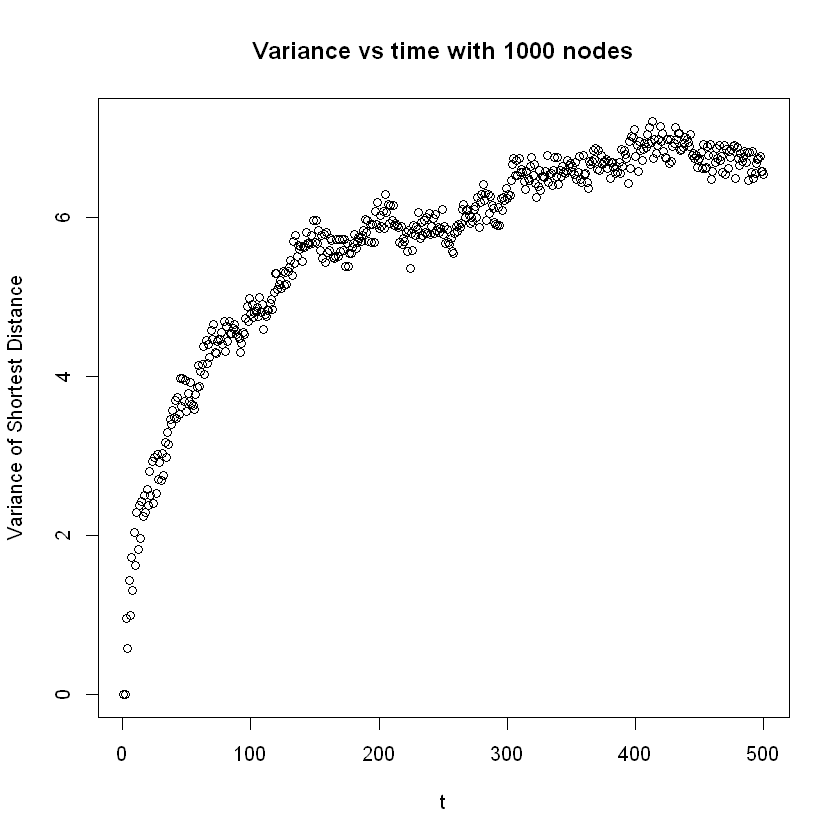

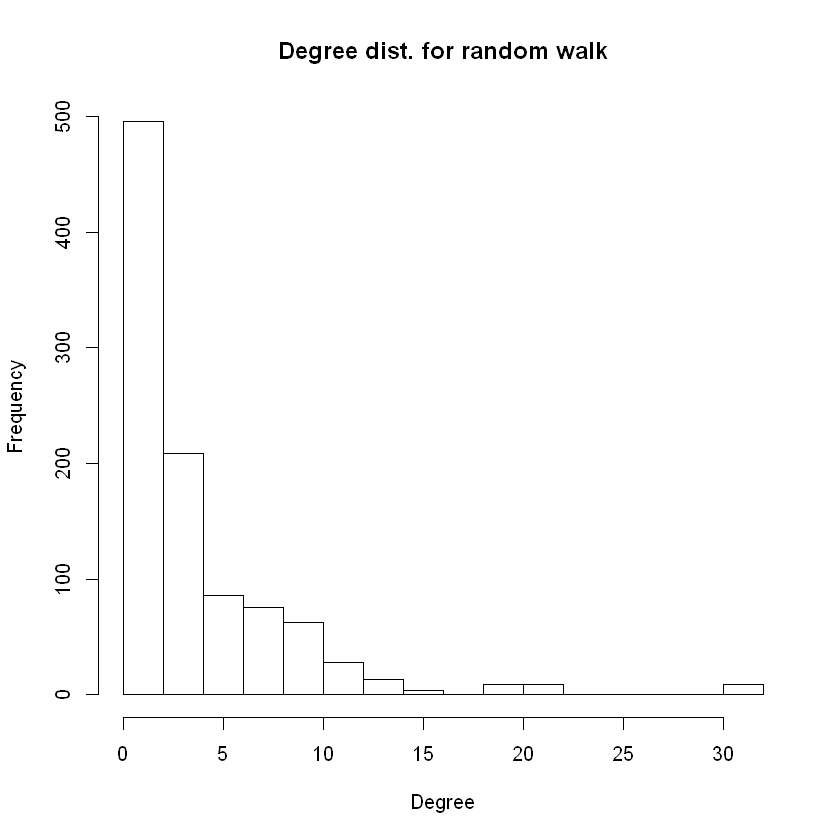

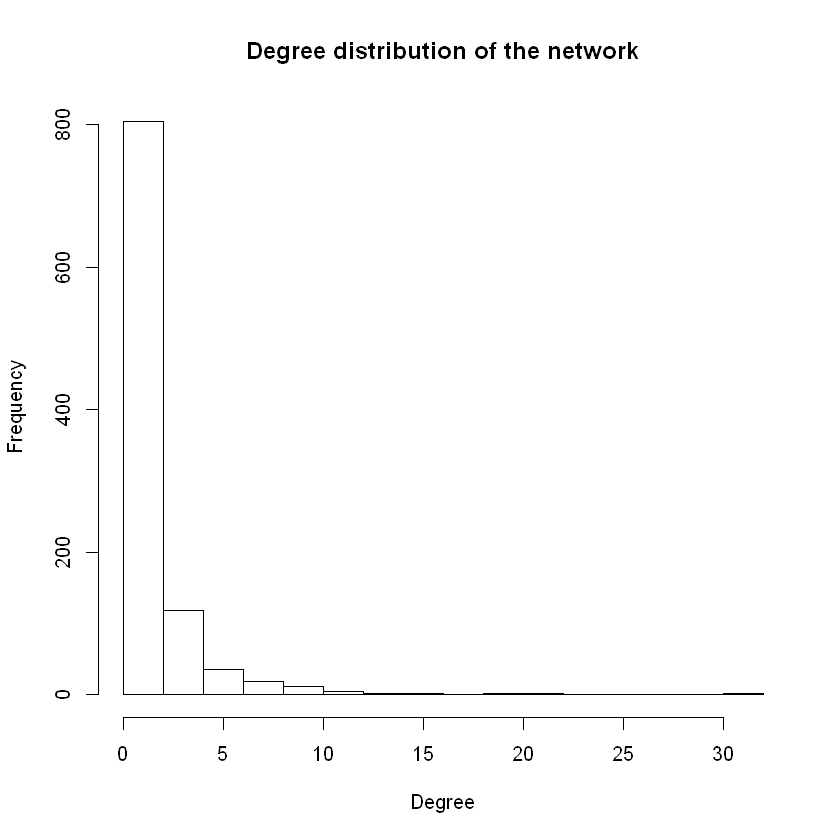

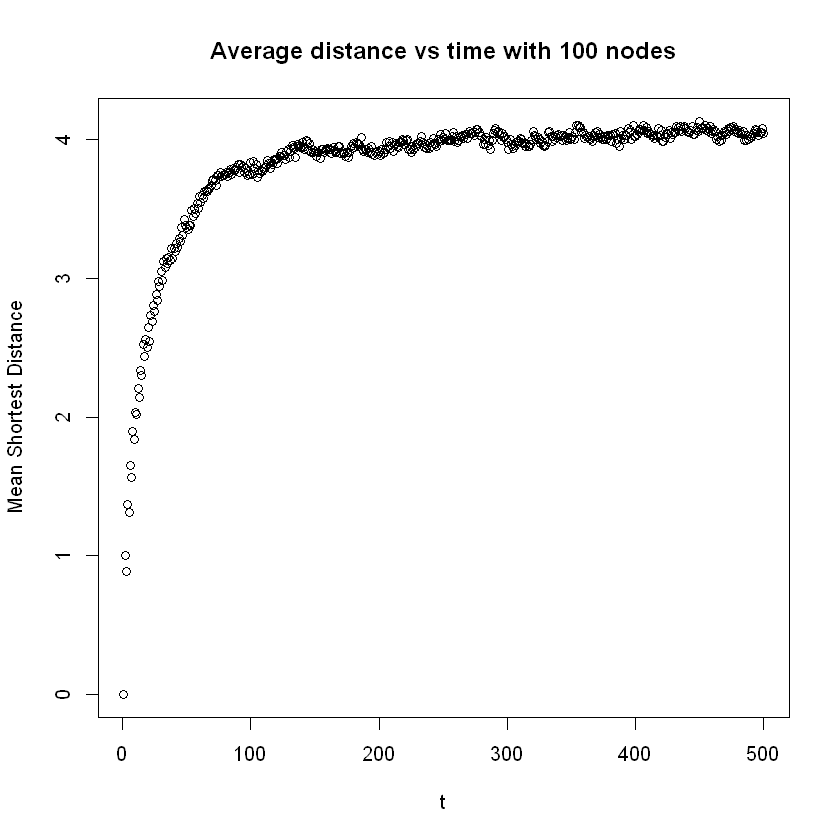

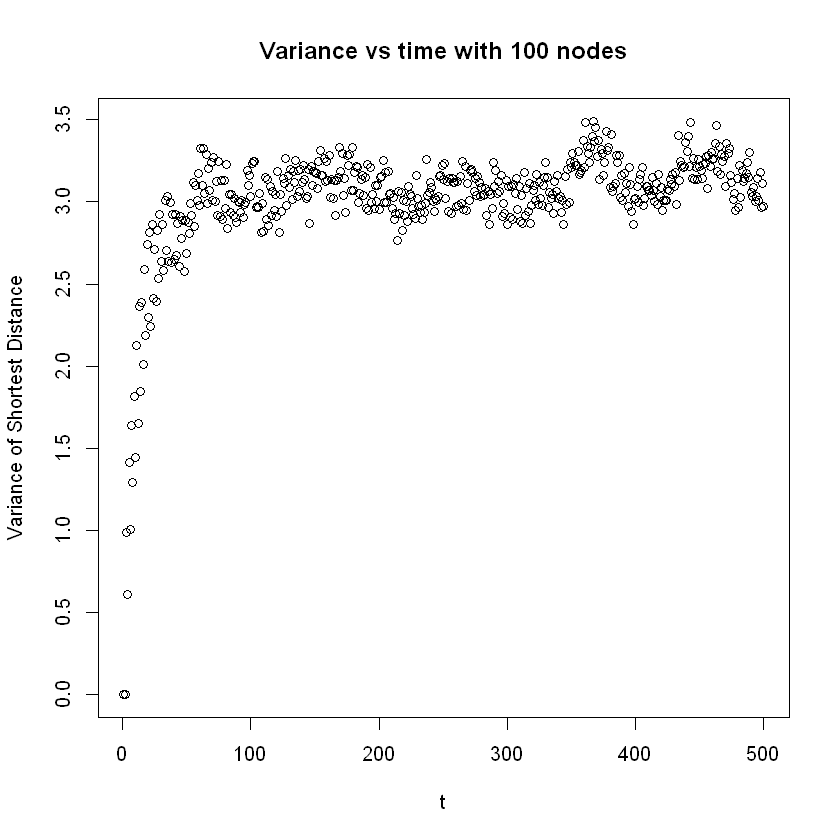

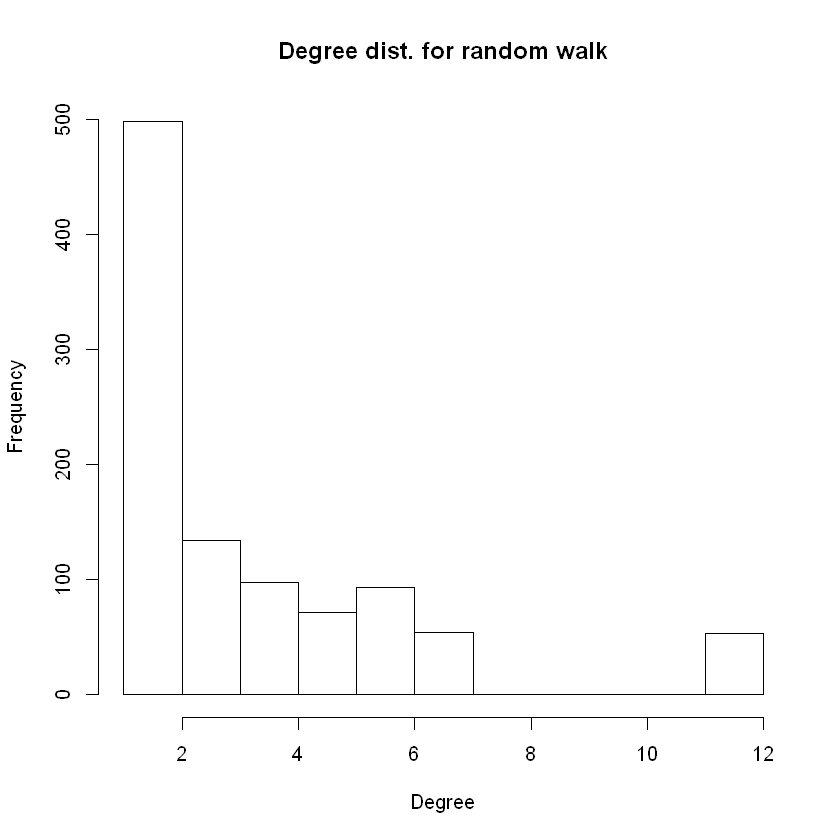

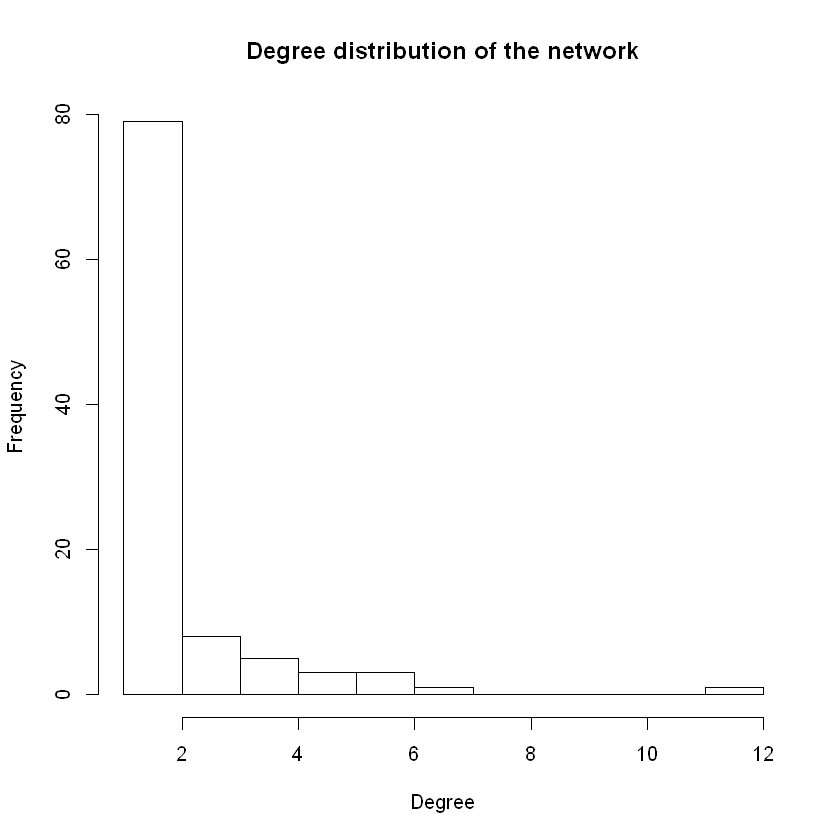

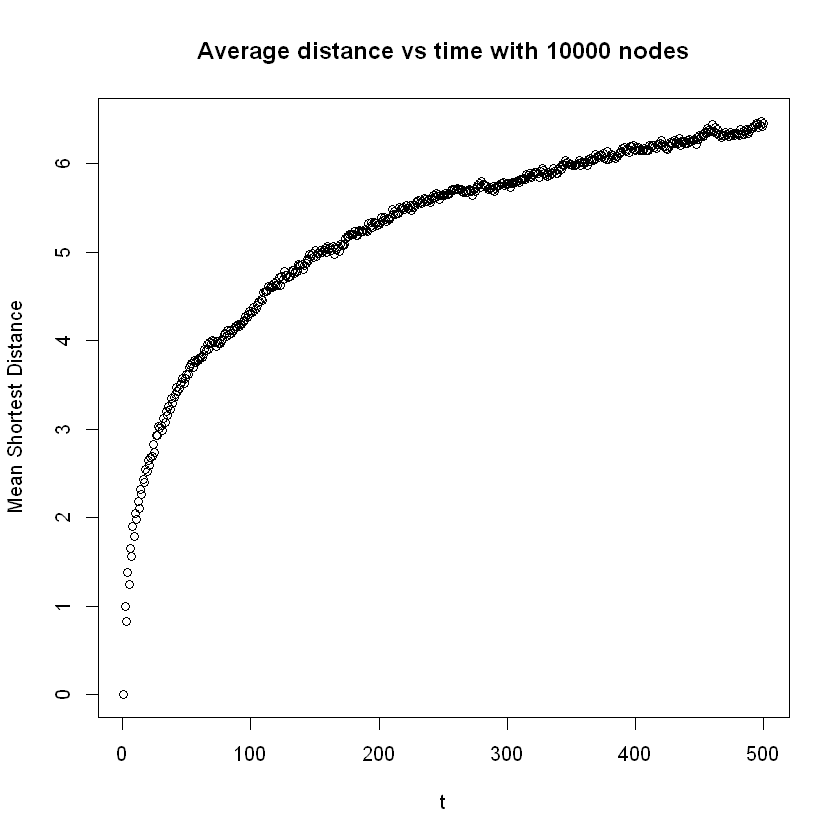

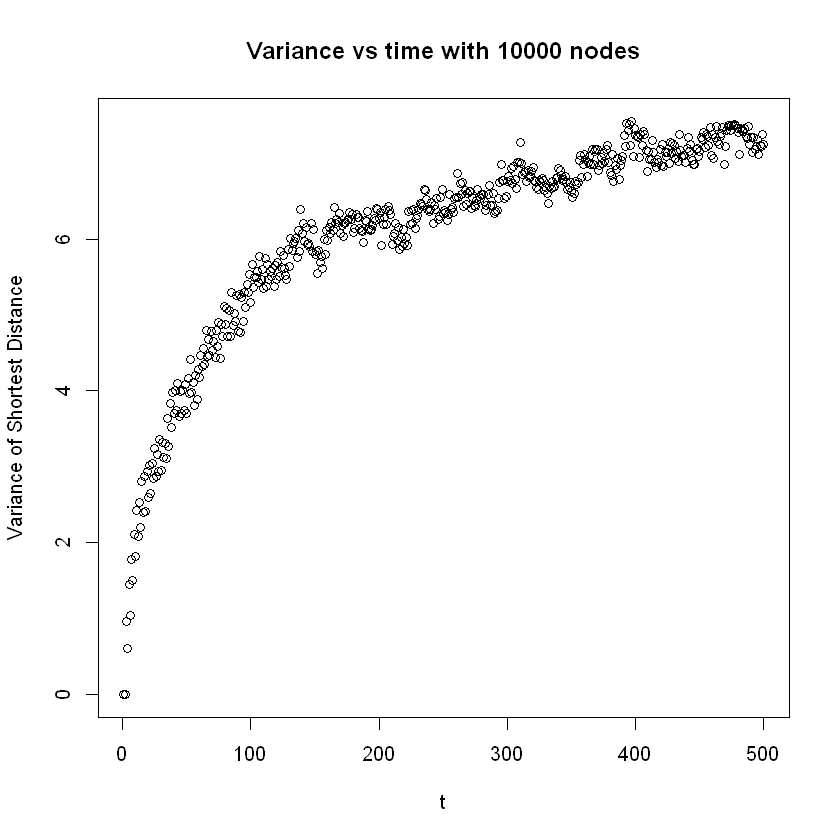

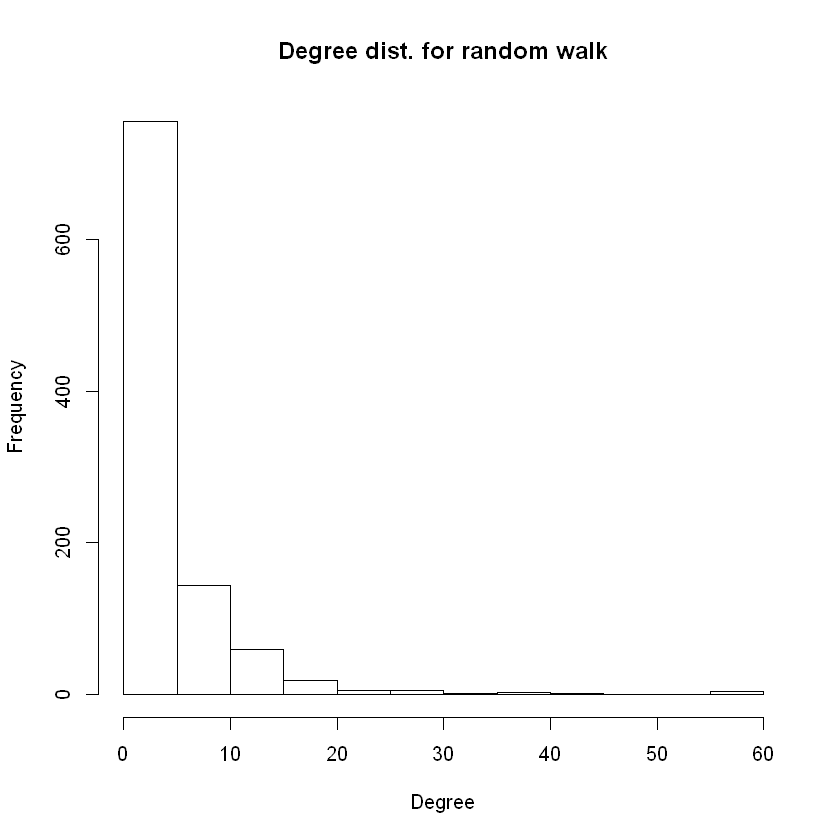

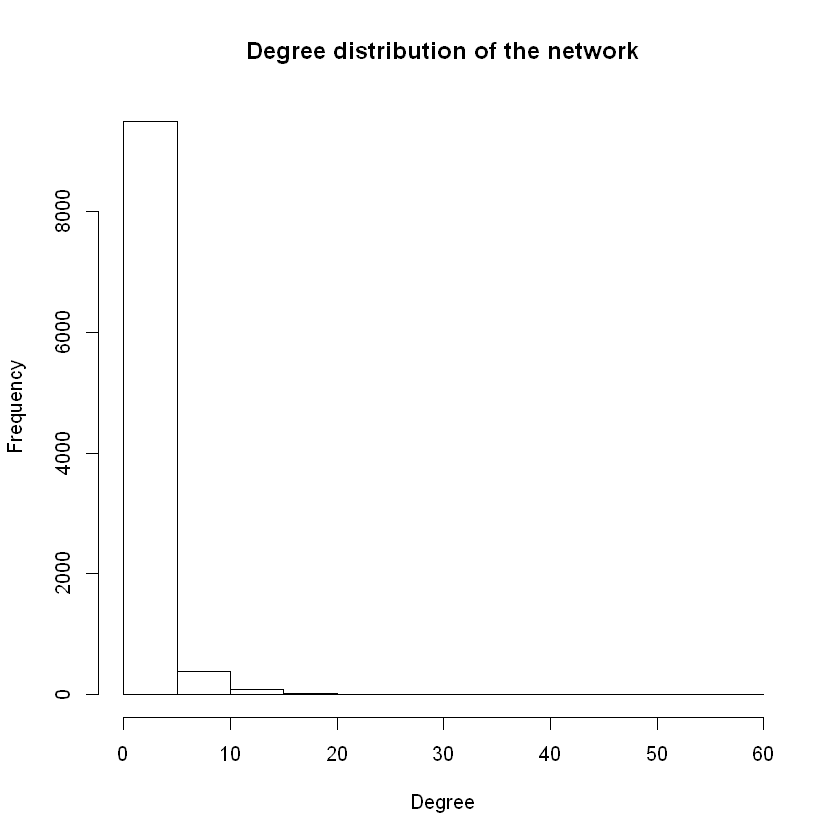

In [27]:
pa_g_age = barabasi.game(1000, m=1, directed=F)
random_walk_with_plots(pa_g_age,1000,NUM_STEPS=500)

pa_g_age = barabasi.game(100, m=1, directed=F)
random_walk_with_plots(pa_g_age,100,NUM_STEPS=500)

pa_g_age = barabasi.game(10000, m=1, directed=F)
random_walk_with_plots(pa_g_age,10000,NUM_STEPS=500)